In [37]:
seq_a = 26591.8
seq_b = 660321
seq_c = 1.37956e7

a = []
b = []
c = []

with open('bsgs.txt', 'r') as f:
    lines = f.read().splitlines()


for i in range(0, len(lines), 4):
    nw = int(lines[i].split(' ')[3])
    a.append(seq_a / float(lines[i+1].split(',')[1]))
    b.append(seq_b / float(lines[i+2].split(',')[1]))
    c.append(seq_c / float(lines[i+3].split(',')[1]))

e_a = []
e_b = []
e_c = []
for i in range(len(a)):
    e_a.append(a[i] / (a[0] * (i+1)))
    e_b.append(b[i] / (b[0] * (i+1)))
    e_c.append(c[i] / (c[0] * (i+1)))
    
c[:3], b[:3]

([1.2861111629034363, 2.782077705223504, 4.265998732161355],
 [1.34892904201097, 2.474511802555003, 3.004203840781805])

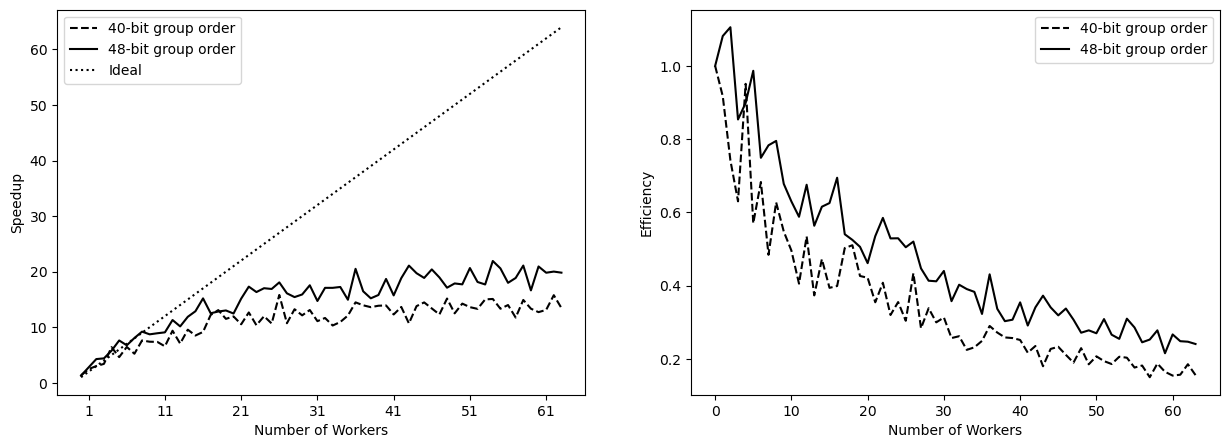

In [54]:
from matplotlib import pyplot as plt

# plot both speedup and efficiency on the same figure, different subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(a, label='32-bit', color='black', linestyle='dashed')
ax1.plot(b, label='40-bit group order', color='black', linestyle='dashed')
ax1.plot(c, label='48-bit group order', color='black', linestyle='solid')
ax1.plot([x+1 for x in range(len(a))], label='Ideal', color='black', linestyle='dotted')
ax1.xaxis.set_ticks([x for x in range(1, len(a)+1, 10)])
ax1.set_xlabel('Number of Workers')
ax1.set_ylabel('Speedup')
# ax1.set_title('Parallel BSGS')
ax1.legend()

# second subplot
# ax2.plot(e_a, label='32-bit', color='black', linestyle='dashed')
ax2.plot(e_b, label='40-bit group order', color='black', linestyle='dashed')
ax2.plot(e_c, label='48-bit group order', color='black', linestyle='solid')
ax2.set_xlabel('Number of Workers')
ax2.set_ylabel('Efficiency')
# ax2.set_title('Parallel BSGS')
ax2.legend()

plt.show()

#fig.savefig('bsgs.pdf')

# save pdf with no borders
fig.savefig('bsgs.pdf', bbox_inches='tight')


In [39]:

with open('load_factor.txt', 'r') as f:
    lines = f.read().splitlines()

data = {}

for i in range(0, len(lines), 4):
    nw = int(lines[i].split(' ')[3])
    load_factor = float(lines[i].split(' ')[-1])
    if data.get(nw) is None:
        data[nw] = []
    data[nw].append((load_factor, float(lines[i+3].split(',')[1]) * nw))


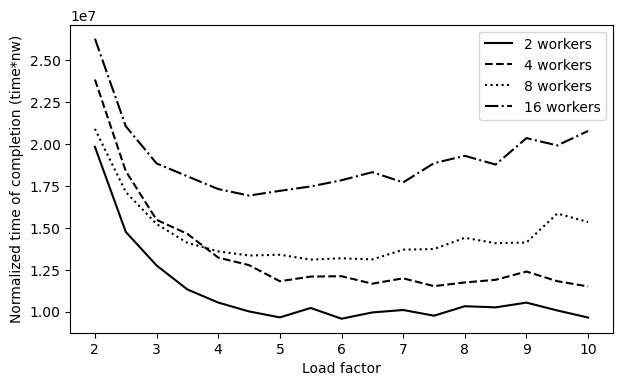

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

for nw, ls in zip(data, ['solid', 'dashed', 'dotted', 'dashdot']):
    ax.plot([x[0] for x in data[nw]], [x[1] for x in data[nw]], label='{} workers'.format(nw), linestyle=ls, color='black')

ax.set_xlabel('Load factor')
ax.set_ylabel('Normalized time of completion (time*nw)')
# ax.set_title('Load factor impact on parallel BSGS')
ax.legend()

plt.show()

fig.savefig('load_factor.pdf')